# Idea

L'idea potrebbe essere di avere una riga per ogni author e come features i subreddit più popolari (ad esempio quelli che si presentano più di 2000 volte) uno per ciascuna colonna e le 10 parole più usate (escluse le banali) nei body. sempre una per ciascuna colonna. Non so se prendere anche le date...

EDIT:
@DATE: si riferiscono al solo mese di gennaio 2014. Si veda codice nel cap. Date:

train_data['created_utc'].map(lambda x: x.year).unique()

train_data['created_utc'].map(lambda x: x.month).unique()

Quindi le uniche info potenzialmente utili sono a che ora i redditers postano, ma non sappiano da dove postano quindi il fuso orario rende il tutto inutilizzabile.

In [1]:
% pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
submission = pd.read_csv('c:/profili/u373173/Desktop/kaggle/sampleSubmission.csv')
train_data = pd.read_csv('c:/profili/u373173/Desktop/kaggle/train_data.csv.gz', dtype={'created_utc': int})
train_target = pd.read_csv('c:/profili/u373173/Desktop/kaggle/train_target.csv', index_col=0)
test_data = pd.read_csv('c:/profili/u373173/Desktop/kaggle/test_data.csv.gz', dtype={'created_utc': int})

In [3]:
submission.head()

,author,gender
0,BGirlTokki,0.0
1,antleredjackrabbit,0.0
2,cbpantskiller,1.0
3,Frearthandox,1.0
4,SPacific,1.0


In [4]:
train_data.head()

,author,subreddit,created_utc,body
0,ejchristian86,TwoXChromosomes,1388534402,I hadn't ever heard of them before joining thi...
1,Shamus_Aran,mylittlepony,1388534404,I don't think we'd get nearly as much fanficti...
2,Riddance,sex,1388534405,"Thanks. I made it up, that's how I got over my..."
3,savoytruffle,AskReddit,1388534408,bite me
4,Secret_Wizard,DragonsDogma,1388534416,Are you sure you aren't confusing Cyclops (the...


In [5]:
train_target.head()

,gender
author,
RedThunder90,0
Lirkmor,1
In0chi,0
ProjectGrudge,0
TehTurtleHermit,0


In [6]:
print train_data.shape
print train_target.shape

(761189, 4)
(10000, 1)


In [7]:
train_data[train_data['author']=='Lirkmor'].shape

(170, 4)

In [8]:
(train_data.shape[0] - train_data.count())/float(train_data.shape[0])*100 # conta vuoti in %

author         0.0
subreddit      0.0
created_utc    0.0
body           0.0
dtype: float64

In [9]:
train_data.isnull().sum()/train_data.shape[0]

author         0.0
subreddit      0.0
created_utc    0.0
body           0.0
dtype: float64

# 1. Date

In [10]:
train_data['created_utc'] = pd.to_datetime(train_data['created_utc'],unit='s')
test_data['created_utc'] = pd.to_datetime(test_data['created_utc'],unit='s')

In [10]:
#train_data['created_utc'].map(lambda x: x.year).unique()

In [11]:
#train_data['created_utc'].map(lambda x: x.month).unique()

In [12]:
#train_data['month'] = train_data['created_utc'].map(lambda x: x.month)

In [13]:
#train_data['created_utc'].map(lambda x: x.month).sort_values(ascending=0)

## 1.1. Test

In [14]:
#date_splitted = train_data['created_utc'].astype(str).str.replace('-' and ':', ' ').str.split()

In [15]:
#date_splitted.head()

In [16]:
#s = pd.Series([['2014 01 01 00 00 02'], ['2014 01 01 00 00 04']])
#s.str.extract('([2014 01])(\d)')

In [17]:
#train_data[['year', 'month', 'day', 'hour']] = date_splitted[]

In [18]:
#train_data.dtypes

# 2. Subreddit

In [19]:
train_data['subreddit'].unique()

array(['TwoXChromosomes', 'mylittlepony', 'sex', ..., 'OneDirection',
       'RandomActsofCards', 'cfs'], dtype=object)

In [20]:
len(train_data['subreddit'].unique())

3866

In [21]:
df = pd.DataFrame([[1, 2], [1, 3], [5, 6], [1, 2], [5, 2]], columns=['A', 'B'])
g = df.groupby('A')
g.apply(lambda x: x[x['B']==2]['B'].count())

A
1    2
5    1
dtype: int64

In [22]:
#train_data_grouped = train_data.groupby('author')['subreddit'].sum()

In [11]:
train_data_grouped = train_data.groupby('author')
#train_data_grouped.apply(lambda x: x[x['subreddit']=='sex']['subreddit'].count()).sort_values()
train_data_grouped.apply(lambda x: x[x['subreddit']=='sex']['subreddit'].count())

author
-Allaina-               0
-Beth-                  0
-Greeny-                0
-Jared                  0
-MM-                    0
-Peeter                 0
-Sikng                  0
-StevieJanowski-        1
-Terriermon-            0
-ThoR-                  0
-XIII-                  2
-evasian                0
-rubiks                 0
-true_neutral-          0
-willis                 0
00101011                0
00708070                0
01100001011101100110    0
0200008                 0
05Lanky05               0
0urlittlesecret         0
0utlander               0
0xJRS                   0
1011001101              0
105Hummel               0
11235813__              0
1127243                 0
115MRD                  0
11trobo                 0
120114                  0
                       ..
zgh5002                 0
zgrimes                 0
zhanae                  0
zhrusk                  0
zhv                     0
ziddyzoom               0
ziezie                  0
ziggy

In [24]:
#train_data_grouped.head()

In [25]:
subreddit_more_2000 = train_data.groupby('subreddit')['subreddit'].count().sort_values(ascending=0)
subreddit_more_2000 = subreddit_more_2000[subreddit_more_2000 > 2000]
print subreddit_more_2000.index
print subreddit_more_2000.index.shape

Index([u'AskReddit', u'beyondthebump', u'AskMen', u'AskWomen',
       u'ExploreFiction', u'AdviceAnimals', u'funny', u'nfl', u'pics', u'WTF',
       u'nba', u'todayilearned', u'teenagers', u'videos', u'gaming', u'CFB',
       u'MakeupAddiction', u'IAmA', u'RatedRFiction', u'leagueoflegends',
       u'hockey', u'worldnews', u'TumblrInAction', u'Random_Acts_Of_Amazon',
       u'movies', u'soccer', u'malefashionadvice', u'relationships', u'sex',
       u'tall', u'cringepics', u'SquaredCircle', u'OkCupid', u'aww',
       u'PercyJacksonRP', u'explainlikeimfive', u'technology', u'changemyview',
       u'TwoXChromosomes', u'news', u'politics', u'dogecoin',
       u'SubredditDrama', u'gifs', u'Fitness', u'electronic_cigarette'],
      dtype='object', name=u'subreddit')
(46L,)


In [12]:
subreddit_more_500 = train_data.groupby('subreddit')['subreddit'].count().sort_values(ascending=0)
subreddit_more_500 = subreddit_more_500[subreddit_more_500 > 500]
print subreddit_more_500.index
print subreddit_more_500.index.shape

Index([u'AskReddit', u'beyondthebump', u'AskMen', u'AskWomen',
       u'ExploreFiction', u'AdviceAnimals', u'funny', u'nfl', u'pics', u'WTF',
       ...
       u'sysadmin', u'reddevils', u'paradoxplaza', u'Showerthoughts',
       u'NoStupidQuestions', u'KerbalSpaceProgram', u'starbound', u'NoFap',
       u'thatHappened', u'FIFA'],
      dtype='object', name=u'subreddit', length=160)
(160L,)


## 2.1. Test

In [26]:
train_data['subreddit']=='AskReddit';

In [27]:
train_data['AskReddit']=train_data['subreddit']=='AskReddit'

In [28]:
train_data_grouped = train_data.groupby('author')

In [29]:
train_data_grouped.apply(lambda x: x['AskReddit'].sum())

author
-Allaina-                0
-Beth-                   0
-Greeny-                 0
-Jared                   3
-MM-                     0
-Peeter                  0
-Sikng                   1
-StevieJanowski-         0
-Terriermon-             1
-ThoR-                   2
-XIII-                   0
-evasian                 1
-rubiks                  0
-true_neutral-           0
-willis                  0
00101011                 0
00708070                 0
01100001011101100110     3
0200008                  1
05Lanky05                0
0urlittlesecret         12
0utlander                3
0xJRS                   20
1011001101               1
105Hummel               10
11235813__               4
1127243                  0
115MRD                   7
11trobo                  8
120114                   0
                        ..
zgh5002                  7
zgrimes                  0
zhanae                   4
zhrusk                   0
zhv                     13
ziddyzoom            

In [30]:
t1=train_data[train_data['author']=='-Jared']

In [31]:
t1[t1['subreddit']=='AskReddit']

,author,subreddit,created_utc,body,AskReddit
542735,-Jared,AskReddit,2014-01-20 03:41:55,Neil Diamond - Sweet Caroline,True
738367,-Jared,AskReddit,2014-01-30 20:13:11,And nothing beats a hangover quite like bacon ...,True
739832,-Jared,AskReddit,2014-01-30 21:33:44,"No, I think YOU mean Taylor Ham... Really, wha...",True


In [32]:
del train_data['AskReddit']
del train_data_grouped
del t1

## 2.2. Aggiungo colonne dei subreddit più popolari

In [33]:
for col in subreddit_more_2000.index:
    train_data[col]=train_data['subreddit']==col

In [13]:
for col in subreddit_more_500.index:
    train_data[col]=train_data['subreddit']==col

In [14]:
train_data.head()

,author,subreddit,created_utc,body,AskReddit,beyondthebump,AskMen,AskWomen,ExploreFiction,AdviceAnimals,...,sysadmin,reddevils,paradoxplaza,Showerthoughts,NoStupidQuestions,KerbalSpaceProgram,starbound,NoFap,thatHappened,FIFA
0,ejchristian86,TwoXChromosomes,2014-01-01 00:00:02,I hadn't ever heard of them before joining thi...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Shamus_Aran,mylittlepony,2014-01-01 00:00:04,I don't think we'd get nearly as much fanficti...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Riddance,sex,2014-01-01 00:00:05,"Thanks. I made it up, that's how I got over my...",False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,savoytruffle,AskReddit,2014-01-01 00:00:08,bite me,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Secret_Wizard,DragonsDogma,2014-01-01 00:00:16,Are you sure you aren't confusing Cyclops (the...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
train_data_grouped = train_data.groupby('author')

In [16]:
train_data_authors = pd.DataFrame({'tot_posts' : train_data_grouped.size()})

In [17]:
train_data_authors.head()

,tot_posts
author,
-Allaina-,5
-Beth-,5
-Greeny-,6
-Jared,6
-MM-,23


In [38]:
train_data_authors['AskReddit'] = train_data_grouped.apply(lambda x: x['AskReddit'].sum())

In [18]:
#for col in subreddit_more_2000.index:
#    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())

In [19]:
for col in subreddit_more_500.index:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())

In [20]:
train_data_authors.head()

,tot_posts,AskReddit,beyondthebump,AskMen,AskWomen,ExploreFiction,AdviceAnimals,funny,nfl,pics,...,sysadmin,reddevils,paradoxplaza,Showerthoughts,NoStupidQuestions,KerbalSpaceProgram,starbound,NoFap,thatHappened,FIFA
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,5,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-Beth-,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
-Greeny-,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-Jared,6,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
-MM-,23,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
for col in train_data_authors.columns:
    train_data_authors.rename(columns={col: col.upper()}, inplace=True)

In [22]:
train_data_authors.head()

,TOT_POSTS,ASKREDDIT,BEYONDTHEBUMP,ASKMEN,ASKWOMEN,EXPLOREFICTION,ADVICEANIMALS,FUNNY,NFL,PICS,...,SYSADMIN,REDDEVILS,PARADOXPLAZA,SHOWERTHOUGHTS,NOSTUPIDQUESTIONS,KERBALSPACEPROGRAM,STARBOUND,NOFAP,THATHAPPENED,FIFA
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,5,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-Beth-,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
-Greeny-,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-Jared,6,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
-MM-,23,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#train_data_authors.to_csv('c:/profili/u373173/Desktop/kaggle/train_data_authors_subreddit.csv')

In [23]:
print train_data_authors.shape

(10000, 161)


In [24]:
for col in train_data.columns:
    train_data.rename(columns={col: col.upper()}, inplace=True)

In [25]:
train_data.head()

,AUTHOR,SUBREDDIT,CREATED_UTC,BODY,ASKREDDIT,BEYONDTHEBUMP,ASKMEN,ASKWOMEN,EXPLOREFICTION,ADVICEANIMALS,...,SYSADMIN,REDDEVILS,PARADOXPLAZA,SHOWERTHOUGHTS,NOSTUPIDQUESTIONS,KERBALSPACEPROGRAM,STARBOUND,NOFAP,THATHAPPENED,FIFA
0,ejchristian86,TwoXChromosomes,2014-01-01 00:00:02,I hadn't ever heard of them before joining thi...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Shamus_Aran,mylittlepony,2014-01-01 00:00:04,I don't think we'd get nearly as much fanficti...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Riddance,sex,2014-01-01 00:00:05,"Thanks. I made it up, that's how I got over my...",False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,savoytruffle,AskReddit,2014-01-01 00:00:08,bite me,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Secret_Wizard,DragonsDogma,2014-01-01 00:00:16,Are you sure you aren't confusing Cyclops (the...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 3. Body

## 3.1. Aggiungo colonne con le 200 parole più popolari (escluse le banali)

In [46]:
import re
WORD_REGEXP = re.compile(r"[\w']+")
WORD_REGEXP.findall(train_data['BODY'][0].lower())
#train_data['body'][0].split()

['i',
 "hadn't",
 'ever',
 'heard',
 'of',
 'them',
 'before',
 'joining',
 'this',
 'subreddit',
 "they're",
 'not',
 'really',
 'a',
 'big',
 'thing',
 'in',
 'the',
 'us',
 'but',
 'are',
 'apparently',
 'very',
 'common',
 'in',
 'many',
 'european',
 'countries',
 'a',
 'menstrual',
 'cup',
 'is',
 'a',
 'small',
 'silicone',
 'cup',
 'with',
 'a',
 'grip',
 'on',
 'the',
 'bottom',
 'usually',
 'a',
 'small',
 'stick',
 'though',
 'some',
 'companies',
 'offer',
 'ball',
 'and',
 'ring',
 'grips',
 'too',
 'that',
 'you',
 'fold',
 'up',
 'and',
 'stick',
 'in',
 'your',
 'vagina',
 'it',
 'pops',
 'open',
 'and',
 'catches',
 'your',
 'menstrual',
 'fluid',
 'you',
 'empty',
 'and',
 'rinse',
 'it',
 'every',
 '12',
 'hours',
 'and',
 'then',
 'reinsert',
 'and',
 'sterilize',
 'it',
 'in',
 'boiling',
 'water',
 'at',
 'the',
 'end',
 'of',
 'every',
 'cycle',
 'unlike',
 'a',
 'pad',
 'or',
 'a',
 'tampon',
 'it',
 'can',
 'be',
 'reused',
 'for',
 'multiple',
 'cycles',
 'som

In [47]:
from collections import Counter

In [48]:
#Counter(WORD_REGEXP.findall(train_data['body'][0].lower())).most_common(100)
most_common_words_1000 = Counter(WORD_REGEXP.findall("".join(train_data['BODY']).lower())).most_common(1000)

In [49]:
for word, count in most_common_words_1000[300:]:
    print word, '-->', count

job --> 7668
definitely --> 7619
each --> 7609
edit --> 7587
using --> 7541
games --> 7462
fact --> 7457
seen --> 7370
between --> 7307
guess --> 7280
whole --> 7244
won't --> 7234
yourself --> 7226
usually --> 7136
girl --> 7135
change --> 7055
fun --> 6987
care --> 6984
talk --> 6943
friend --> 6936
mind --> 6936
god --> 6930
ask --> 6901
talking --> 6893
remember --> 6850
almost --> 6814
case --> 6791
free --> 6753
home --> 6741
stop --> 6623
sometimes --> 6615
gets --> 6608
sorry --> 6606
instead --> 6596
found --> 6595
quite --> 6530
top --> 6505
hope --> 6482
youtube --> 6464
means --> 6459
against --> 6441
imgur --> 6429
wanted --> 6418
agree --> 6401
sounds --> 6401
buy --> 6325
call --> 6282
name --> 6267
rather --> 6255
started --> 6224
true --> 6222
yet --> 6201
second --> 6199
especially --> 6174
thank --> 6107
v --> 6103
run --> 6100
question --> 6090
comments --> 6049
pay --> 6039
she's --> 6039
team --> 6019
often --> 6015
awesome --> 5990
car --> 5987
ago --> 5973
you'l

In [50]:
if 'every' in Counter(WORD_REGEXP.findall(train_data['BODY'][0].lower())):
    print Counter(WORD_REGEXP.findall(train_data['BODY'][0].lower()))['every']

2


In [51]:
for word, count in most_common_words_1000[300:500]:
    print word, '\t-->\t', Counter(WORD_REGEXP.findall(train_data['BODY'][0].lower()))[word]

job 	-->	0
definitely 	-->	0
each 	-->	0
edit 	-->	1
using 	-->	0
games 	-->	0
fact 	-->	0
seen 	-->	0
between 	-->	0
guess 	-->	0
whole 	-->	0
won't 	-->	1
yourself 	-->	0
usually 	-->	1
girl 	-->	0
change 	-->	0
fun 	-->	0
care 	-->	0
talk 	-->	0
friend 	-->	0
mind 	-->	0
god 	-->	0
ask 	-->	0
talking 	-->	0
remember 	-->	0
almost 	-->	0
case 	-->	0
free 	-->	0
home 	-->	0
stop 	-->	0
sometimes 	-->	0
gets 	-->	0
sorry 	-->	0
instead 	-->	0
found 	-->	0
quite 	-->	0
top 	-->	0
hope 	-->	0
youtube 	-->	0
means 	-->	0
against 	-->	0
imgur 	-->	0
wanted 	-->	0
agree 	-->	0
sounds 	-->	0
buy 	-->	0
call 	-->	0
name 	-->	0
rather 	-->	0
started 	-->	0
true 	-->	0
yet 	-->	0
second 	-->	0
especially 	-->	0
thank 	-->	0
v 	-->	0
run 	-->	0
question 	-->	0
comments 	-->	0
pay 	-->	0
she's 	-->	0
team 	-->	0
often 	-->	0
awesome 	-->	0
car 	-->	0
ago 	-->	0
you'll 	-->	0
u 	-->	0
relationship 	-->	0
full 	-->	0
we're 	-->	0
small 	-->	2
haven't 	-->	0
hate 	-->	0
experience 	-->	0
woman 	-->	

In [52]:
for row in train_data[:2].index:
    for word, count in most_common_words_1000[300:]:
        print Counter(WORD_REGEXP.findall(train_data['BODY'][row].lower()))[word]
    print '********'

0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0


In [53]:
#train_data.to_sparse(fill_value=0)

In [54]:
for word, count in most_common_words_1000[300:500]:
    train_data[word]=None

In [55]:
train_data.head()

,AUTHOR,SUBREDDIT,CREATED_UTC,BODY,ASKREDDIT,BEYONDTHEBUMP,ASKMEN,ASKWOMEN,EXPLOREFICTION,ADVICEANIMALS,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
0,ejchristian86,TwoXChromosomes,2014-01-01 00:00:02,I hadn't ever heard of them before joining thi...,False,False,False,False,False,False,...,None,None,None,None,None,None,None,None,None,None
1,Shamus_Aran,mylittlepony,2014-01-01 00:00:04,I don't think we'd get nearly as much fanficti...,False,False,False,False,False,False,...,None,None,None,None,None,None,None,None,None,None
2,Riddance,sex,2014-01-01 00:00:05,"Thanks. I made it up, that's how I got over my...",False,False,False,False,False,False,...,None,None,None,None,None,None,None,None,None,None
3,savoytruffle,AskReddit,2014-01-01 00:00:08,bite me,True,False,False,False,False,False,...,None,None,None,None,None,None,None,None,None,None
4,Secret_Wizard,DragonsDogma,2014-01-01 00:00:16,Are you sure you aren't confusing Cyclops (the...,False,False,False,False,False,False,...,None,None,None,None,None,None,None,None,None,None


In [56]:
print train_data.ix[1][4:56] # controllo che non vengano sovrascritte colonne

ASKREDDIT                False
BEYONDTHEBUMP            False
ASKMEN                   False
ASKWOMEN                 False
EXPLOREFICTION           False
ADVICEANIMALS            False
FUNNY                    False
NFL                      False
PICS                     False
WTF                      False
NBA                      False
TODAYILEARNED            False
TEENAGERS                False
VIDEOS                   False
GAMING                   False
CFB                      False
MAKEUPADDICTION          False
IAMA                     False
RATEDRFICTION            False
LEAGUEOFLEGENDS          False
HOCKEY                   False
WORLDNEWS                False
TUMBLRINACTION           False
RANDOM_ACTS_OF_AMAZON    False
MOVIES                   False
SOCCER                   False
MALEFASHIONADVICE        False
RELATIONSHIPS            False
SEX                      False
TALL                     False
CRINGEPICS               False
SQUAREDCIRCLE            False
OKCUPID 

In [57]:
train_data.shape[0]

761189

In [58]:
Counter(re.split(r"[^\w']+",train_data['BODY'].str.lower()[0]))

Counter({'': 1,
         '10': 1,
         '12': 1,
         'a': 7,
         'and': 8,
         'apparently': 1,
         'approved': 1,
         'are': 1,
         'at': 2,
         'ball': 1,
         'be': 1,
         'because': 1,
         'before': 1,
         'big': 1,
         'boast': 1,
         'boiling': 1,
         'bottom': 1,
         'brand': 1,
         'but': 2,
         'ca': 1,
         'can': 1,
         "can't": 1,
         'catches': 1,
         'changed': 1,
         'com': 1,
         'common': 2,
         'companies': 2,
         'countries': 1,
         'cup': 3,
         'cups': 2,
         'cycle': 1,
         'cycles': 1,
         'diva': 1,
         'divacup': 1,
         'earliest': 1,
         'edit': 1,
         'empty': 1,
         'end': 1,
         'european': 1,
         'ever': 1,
         'every': 2,
         'fb': 1,
         'fda': 1,
         'fluid': 1,
         'fold': 1,
         'for': 1,
         'get': 1,
         'great': 1,
         'g

In [59]:
train_data['BODY2'] = train_data['BODY'].str.lower().str.split(r"[^\w']+")

In [60]:
train_data['BODY2'] = train_data['BODY2'].apply(lambda x: Counter(x))

In [61]:
train_data['BODY2'].head()

0    {u'': 1, u'just': 1, u'subreddit': 1, u'pops':...
1    {u'and': 2, u'saying': 1, u'lyro': 1, u'just':...
2    {u'': 1, u'heart': 1, u'made': 1, u'i': 2, u'o...
3                               {u'me': 1, u'bite': 1}
4    {u'and': 1, u'': 1, u'playthrough': 1, u'barel...
Name: BODY2, dtype: object

In [62]:
#def funzio():
for word,count in most_common_words_1000[300:320]:
    train_data[word] = train_data['BODY2'].apply(lambda x: x[word])

print word, count
del word, count

friend 6936


In [63]:
for word,count in most_common_words_1000[320:340]:
    train_data[word] = train_data['BODY2'].apply(lambda x: x[word])

word
del word, count

for word,count in most_common_words_1000[340:360]:
    train_data[word] = train_data['BODY2'].apply(lambda x: x[word])

word
del word, count

for word,count in most_common_words_1000[360:380]:
    train_data[word] = train_data['BODY2'].apply(lambda x: x[word])

word
del word, count

for word,count in most_common_words_1000[380:400]:
    train_data[word] = train_data['BODY2'].apply(lambda x: x[word])

word
del word, count

for word,count in most_common_words_1000[400:420]:
    train_data[word] = train_data['BODY2'].apply(lambda x: x[word])

word
del word, count

for word,count in most_common_words_1000[420:440]:
    train_data[word] = train_data['BODY2'].apply(lambda x: x[word])

word
del word, count

for word,count in most_common_words_1000[440:460]:
    train_data[word] = train_data['BODY2'].apply(lambda x: x[word])

word
del word, count

for word,count in most_common_words_1000[460:480]:
    train_data[word] = train_data['BODY2'].apply(lambda x: x[word])

word
del word, count

for word,count in most_common_words_1000[480:500]:
    train_data[word] = train_data['BODY2'].apply(lambda x: x[word])

word
del word, count

train_data.to_csv('c:/profili/u373173/Desktop/kaggle/train_data_prepared.csv', index=None)

In [64]:
train_data[0:1].T[200:]

,0
taking,0
okay,0
must,0
hours,1
jpg,0
damn,0
open,1
move,0
single,0
close,0


In [81]:
#%timeit -n5 funzio()

5 loops, best of 3: 13.9 s per loop


In [77]:
#train_data.to_csv('c:/profili/u373173/Desktop/kaggle/train_data_prepared1.csv', index=None)

In [65]:
#train_data_prepared = pd.read_csv('c:/profili/u373173/Desktop/kaggle/train_data_prepared1.csv')

In [90]:
import pandas as pd

In [50]:
train_data = pd.read_csv('c:/profili/u373173/Desktop/kaggle/train_data_prepared.csv')

In [66]:
#train_data_prepared.head(2)

In [51]:
train_data.ix[0]

AUTHOR                                                       ejchristian86
SUBREDDIT                                                  TwoXChromosomes
CREATED_UTC                                            2014-01-01 00:00:02
BODY                     I hadn't ever heard of them before joining thi...
ASKREDDIT                                                            False
BEYONDTHEBUMP                                                        False
ASKMEN                                                               False
ASKWOMEN                                                             False
EXPLOREFICTION                                                       False
ADVICEANIMALS                                                        False
FUNNY                                                                False
NFL                                                                  False
PICS                                                                 False
WTF                      

## 3.2. Conto per ogni autore le occorrenze delle 200 parole più popolari

In [52]:
train_data_grouped = train_data.groupby('AUTHOR')

In [53]:
train_data_grouped['water'].sum()

AUTHOR
-Allaina-               0
-Beth-                  0
-Greeny-                0
-Jared                  0
-MM-                    0
-Peeter                 0
-Sikng                  0
-StevieJanowski-        0
-Terriermon-            0
-ThoR-                  0
-XIII-                  0
-evasian                0
-rubiks                 0
-true_neutral-          0
-willis                 0
00101011                0
00708070                0
01100001011101100110    0
0200008                 0
05Lanky05               0
0urlittlesecret         1
0utlander               1
0xJRS                   1
1011001101              0
105Hummel               1
11235813__              0
1127243                 0
115MRD                  3
11trobo                 0
120114                  0
                       ..
zgh5002                 0
zgrimes                 0
zhanae                  0
zhrusk                  0
zhv                     0
ziddyzoom               0
ziezie                  0
ziggy

In [56]:
for word, count in most_common_words_1000[300:500]:
    train_data_authors[word]=None

In [60]:
train_data_authors[train_data_authors.columns].head(2)

,edit,using,games,fact,seen,between,guess,whole,won't,yourself,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [90]:
for col, count in most_common_words_1000[300:303]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count

In [91]:
for col, count in most_common_words_1000[303:306]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count

In [95]:
for col, count in most_common_words_1000[306:309]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count

In [98]:
for col, count in most_common_words_1000[309:312]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count

In [100]:
for col, count in most_common_words_1000[312:315]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count

In [102]:
for col, count in most_common_words_1000[315:318]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count

In [104]:
for col, count in most_common_words_1000[318:321]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count

In [106]:
for col, count in most_common_words_1000[321:328]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count

In [108]:
for col, count in most_common_words_1000[328:335]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count

In [113]:
for col, count in most_common_words_1000[335:342]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count

In [119]:
for col, count in most_common_words_1000[342:345]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count

In [121]:
for col, count in most_common_words_1000[345:350]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count

In [140]:
for col, count in most_common_words_1000[350:355]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[90:]].head(2)

,agree,sounds,buy,call,name,rather,started,true,yet,second,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [141]:
for col, count in most_common_words_1000[355:360]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[100:]].head(2)

,especially,thank,v,run,question,comments,pay,she's,team,often,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [149]:
for col, count in most_common_words_1000[360:365]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[110:]].head(2)

,awesome,car,ago,you'll,u,relationship,full,we're,small,haven't,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [150]:
for col, count in most_common_words_1000[365:370]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[120:]].head(2)

,hate,experience,woman,exactly,however,kids,left,side,sense,face,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [151]:
for col, count in most_common_words_1000[370:375]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[130:]].head(2)

,seem,others,came,fine,told,week,course,set,matter,happy,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [152]:
for col, count in most_common_words_1000[375:380]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[130:]].head(2)

,seem,others,came,fine,told,week,course,set,matter,happy,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [153]:
for col, count in most_common_words_1000[380:385]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[130:]].head(2)

,seem,others,came,fine,told,week,course,set,matter,happy,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [154]:
for col, count in most_common_words_1000[385:390]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[130:]].head(2)

,seem,others,came,fine,told,week,course,set,matter,happy,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,1,0,0,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [155]:
for col, count in most_common_words_1000[390:395]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[135:]].head(2)

,week,course,set,matter,happy,please,completely,ones,body,cool,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [156]:
for col, count in most_common_words_1000[395:400]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[135:]].head(2)

,week,course,set,matter,happy,please,completely,ones,body,cool,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [157]:
for col, count in most_common_words_1000[400:405]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[140:]].head(2)

,please,completely,ones,body,cool,family,took,months,unless,playing,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [158]:
for col, count in most_common_words_1000[405:410]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[140:]].head(2)

,please,completely,ones,body,cool,family,took,months,unless,playing,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [159]:
for col, count in most_common_words_1000[410:415]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[145:]].head(2)

,family,took,months,unless,playing,likely,story,whatever,half,black,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [160]:
for col, count in most_common_words_1000[415:420]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[145:]].head(2)

,family,took,months,unless,playing,likely,story,whatever,half,black,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [161]:
for col, count in most_common_words_1000[420:425]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[145:]].head(2)

,family,took,months,unless,playing,likely,story,whatever,half,black,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [162]:
for col, count in most_common_words_1000[425:430]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[155:]].head(2)

,level,thinking,under,s,head,comes,heard,together,night,worth,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,0,0,1,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [163]:
for col, count in most_common_words_1000[430:435]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[160:]].head(2)

,comes,heard,together,night,worth,comment,works,couple,you've,working,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,1,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [164]:
for col, count in most_common_words_1000[435:440]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[170:]].head(2)

,happen,op,power,video,sort,deal,check,called,white,wait,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [165]:
for col, count in most_common_words_1000[440:445]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[180:]].head(2)

,hand,during,tried,easy,system,20,8,issue,house,hell,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [166]:
for col, count in most_common_words_1000[445:450]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[190:]].head(2)

,basically,possible,needs,saw,line,state,goes,taking,okay,must,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [167]:
for col, count in most_common_words_1000[450:455]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[200:]].head(2)

,hours,jpg,damn,open,move,single,close,says,couldn't,based,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [168]:
for col, count in most_common_words_1000[455:460]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[200:]].head(2)

,hours,jpg,damn,open,move,single,close,says,couldn't,based,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,None,None,None,...,None,None,None,None,None,None,None,None,None,None


ciao

In [169]:
for col, count in most_common_words_1000[460:465]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[210:]].head(2)

,super,hit,seriously,what's,similar,number,org,food,happened,situation,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [170]:
for col, count in most_common_words_1000[465:470]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[210:]].head(2)

,super,hit,seriously,what's,similar,number,org,food,happened,situation,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,1,0,0,0,0,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [171]:
for col, count in most_common_words_1000[470:475]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[220:]].head(2)

,later,important,example,water,three,girls,hair,interesting,past,add,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [172]:
for col, count in most_common_words_1000[475:480]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[220:]].head(2)

,later,important,example,water,three,girls,hair,interesting,past,add,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,1,None,None,None,...,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [173]:
for col, count in most_common_words_1000[480:485]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[230:]].head(2)

,huge,amazing,7,short,100,anyway,wiki,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,
-Allaina-,0,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [174]:
for col, count in most_common_words_1000[485:490]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[230:]].head(2)

,huge,amazing,7,short,100,anyway,wiki,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,None,None,None,None,None,None,None,None,None,None
-Beth-,0,0,0,0,0,0,0,None,None,None,None,None,None,None,None,None,None


In [175]:
for col, count in most_common_words_1000[490:495]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[230:]].head(2)

,totally,mine,support,word,leave,turn,non
author,,,,,,,
-Allaina-,0,0,None,None,None,None,None
-Beth-,0,0,None,None,None,None,None


In [179]:
for col, count in most_common_words_1000[495:500]:
    train_data_authors[col] = train_data_grouped.apply(lambda x: x[col].sum())
    
del col, count
train_data_authors[train_data_authors.columns[230:]].head(2)

,huge,amazing,7,short,100,anyway,wiki,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,
-Allaina-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-Beth-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [183]:
train_data_authors[0:1].T[47:]

author,-Allaina-
job,0
definitely,0
each,1
edit,0
using,0
games,0
fact,0
seen,0
between,0
guess,0


In [193]:
#del train_data_authors_sparse

In [191]:
#train_data_authors_sparse = train_data_authors.to_sparse(fill_value=0)

In [194]:
#train_data_authors.to_csv('c:/profili/u373173/Desktop/kaggle/train_data_authors.csv')

In [190]:
#train_data_authors = pd.read_csv('c:/profili/u373173/Desktop/kaggle/train_data_authors.csv', index_col=0)
#train_data_authors.head(2)

In [36]:
dummy = pd.read_csv('c:/profili/u373173/Desktop/kaggle/train_data_authors_2000.csv', index_col=0)
dummy = dummy[dummy.columns[47:]]

In [47]:
train_data_authors = train_data_authors.join(dummy, how='inner')

In [50]:
train_data_authors.head()

,TOT_POSTS,ASKREDDIT,BEYONDTHEBUMP,ASKMEN,ASKWOMEN,EXPLOREFICTION,ADVICEANIMALS,FUNNY,NFL,PICS,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,5,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-Beth-,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
-Greeny-,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-Jared,6,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
-MM-,23,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,3,0


# Panisson - START

In [285]:
subreddits = train_data.subreddit.unique()
subreddits_map = pd.Series(index=subreddits, data=arange(subreddits.shape[0]))

In [286]:
from scipy import sparse

In [292]:
def extract_features(group):
    group_subreddits = group['subreddit'].values
    idxs = subreddits_map[group_subreddits].values
    v = sparse.dok_matrix((1, subreddits.shape[0]))
    for idx in idxs:
        if not np.isnan(idx):
            v[0, idx] = 1
    return v.tocsr()

RedThunder90 = extract_features(train_data[train_data.author=='RedThunder90'])
RedThunder90.todense().shape

(1L, 3866L)

# Panisson - END

# 4. Modelli

In [56]:
from sklearn import cross_validation as cs
from sklearn import metrics
from sklearn import grid_search

In [57]:
train_target = train_target.sort_index()

In [58]:
train_target

,gender
author,
-Allaina-,1
-Beth-,1
-Greeny-,0
-Jared,0
-MM-,0
-Peeter,0
-Sikng,1
-StevieJanowski-,0
-Terriermon-,1


In [209]:
X_train, X_test, y_train, y_test =\
cs.train_test_split(train_data_authors,train_target, test_size=0.33,random_state=42)

In [210]:
X_train.head()

,TOT_POSTS,ASKREDDIT,BEYONDTHEBUMP,ASKMEN,ASKWOMEN,EXPLOREFICTION,ADVICEANIMALS,FUNNY,NFL,PICS,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
pomjuice,118,56,0,0,0,0,0,0,0,0,...,0,1,0,2,2,0,1,3,0,0
anti_skub,65,0,0,58,6,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
tangonovember,50,0,0,21,0,0,3,0,0,0,...,0,1,5,1,1,11,0,2,0,0
Sr_deez,513,0,0,0,0,0,0,0,0,2,...,0,3,0,2,3,1,0,10,0,7
impsnipe,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
y_train.head()

,gender
author,
pomjuice,0
anti_skub,0
tangonovember,0
Sr_deez,0
impsnipe,1


In [61]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(6700, 360)
(6700, 1)
(3300, 360)
(3300, 1)


In [239]:
#X = X_train.as_matrix()
#del X

## 4.1. Perceptron

In [273]:
from sklearn import linear_model

model = linear_model.Perceptron(penalty='l2')

alphas = np.logspace(-4, 0, 20)

gs = grid_search.GridSearchCV(model, {'alpha': alphas}, cv=10)
gs.fit(X_train,ravel(y_train))

print "best alpha:", gs.best_params_

y_pred = gs.predict(X_test)

best alpha: {'alpha': 0.0001623776739188721}


F1 Score : 0.388266666667
AUC: 0.577391707325
[<matplotlib.lines.Line2D object at 0x000000008C4E4208>, <matplotlib.lines.Line2D object at 0x000000004D9AE6A0>]


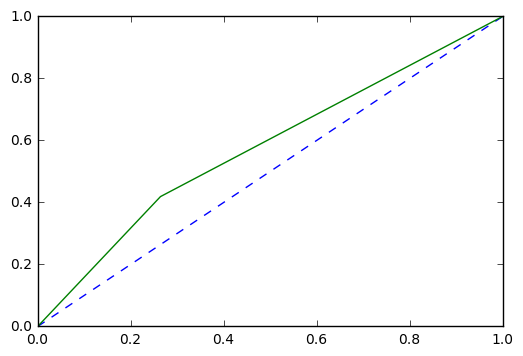

In [274]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
print 'F1 Score :', metrics.f1_score(y_test, y_pred)
print 'AUC:', metrics.auc(fpr, tpr)

print plot([0,1],[0,1],'--', fpr, tpr)

## 4.2. Logistic Regression

In [277]:
from sklearn import linear_model

model = linear_model.LogisticRegression(penalty='l1')

Cs = np.logspace(-4, 0, 20)

gs = grid_search.GridSearchCV(model, {'C': Cs}, cv=10) # C non  il peso del regolarizzatore ma della parte della logit
gs.fit(X_train,ravel(y_train))

print "best C:", gs.best_params_

y_pred = gs.predict(X_test)

best C: {'C': 0.14384498882876631}


F1 Score : 0.506687647522
AUC: 0.668816291676
[<matplotlib.lines.Line2D object at 0x000000008B70E1D0>, <matplotlib.lines.Line2D object at 0x0000000064F940B8>]


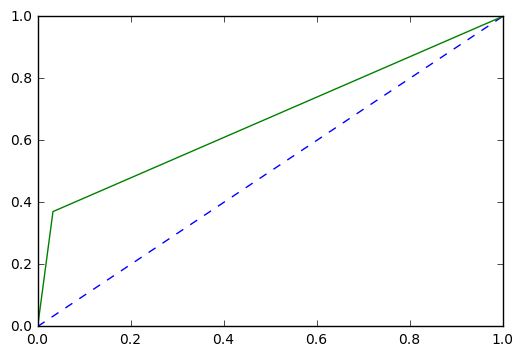

In [278]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
print 'F1 Score :', metrics.f1_score(y_test, y_pred)
print 'AUC:', metrics.auc(fpr, tpr)

print plot([0,1],[0,1],'--', fpr, tpr)

## 4.3. Naive Bayes

In [275]:
from sklearn import naive_bayes

naive_bayes.MultinomialNB()

model = naive_bayes.GaussianNB()
model.fit(X_train,ravel(y_train))

y_pred = model.predict(X_test)

F1 Score : 0.448481561822
AUC: 0.56612635317
[<matplotlib.lines.Line2D object at 0x00000000A3AC0BA8>, <matplotlib.lines.Line2D object at 0x000000004A30E240>]


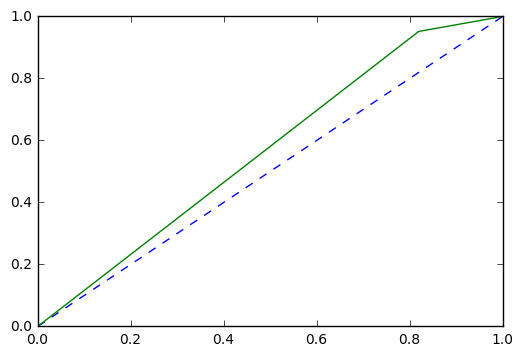

In [276]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
print 'F1 Score :', metrics.f1_score(y_test, y_pred)
print 'AUC:', metrics.auc(fpr, tpr)

print plot([0,1],[0,1],'--', fpr, tpr)

## 4.4. Support Vector Machines

In [280]:
from sklearn import svm

model = svm.SVC(kernel='rbf', gamma=0.1, C=100.)

Cs = np.logspace(-2,2,10)
gammas = np.logspace(-4, 0, 10)

gs = grid_search.GridSearchCV(model, {'gamma': gammas, 'C': Cs}, cv=10)
gs.fit(X_train,ravel(y_train))

print "best:", gs.best_params_

y_pred = gs.predict(X_test)

best: {'C': 100.0, 'gamma': 0.0001}


F1 Score : 0.50534351145
AUC: 0.667824357325
[<matplotlib.lines.Line2D object at 0x0000000058054B70>, <matplotlib.lines.Line2D object at 0x00000000A3ADB940>]


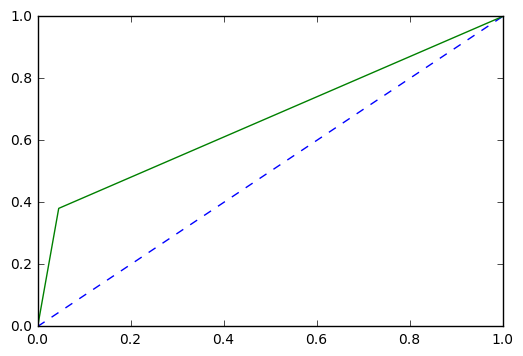

In [281]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
print 'F1 Score :', metrics.f1_score(y_test, y_pred)
print 'AUC:', metrics.auc(fpr, tpr)

print plot([0,1],[0,1],'--', fpr, tpr)

In [282]:
import ipybell
%bell print 'hello'

hello


<ExecutionResult object at a3adba90, execution_count=None error_before_exec=None error_in_exec=None result=None>

In [288]:
print 'Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred)
print 'Precision:', metrics.precision_score(y_test, y_pred)
print 'Recall:', metrics.recall_score(y_test, y_pred)
print 'Precision, Recall, F Score:', metrics.precision_recall_fscore_support(y_test, y_pred)

Confusion matrix:
[[2321  110]
 [ 538  331]]
Precision: 0.750566893424
Recall: 0.380897583429
Precision, Recall, F Score: (array([ 0.81182232,  0.75056689]), array([ 0.95475113,  0.38089758]), array([ 0.87750473,  0.50534351]), array([2431,  869], dtype=int64))


## 4.5. Random Forest

In [292]:
from sklearn import ensemble

model_rf = ensemble.RandomForestClassifier(n_estimators=200, random_state=0)
model_rf.fit(X_train,ravel(y_train))

y_pred_rf = model_rf.predict(X_test)

In [297]:
tree = model_rf.estimators_[0].feature_importances_
#tree

F1 Score : 0.5328125
AUC: 0.681805164307
[<matplotlib.lines.Line2D object at 0x00000000396E3C50>, <matplotlib.lines.Line2D object at 0x00000000A3ACE0F0>]


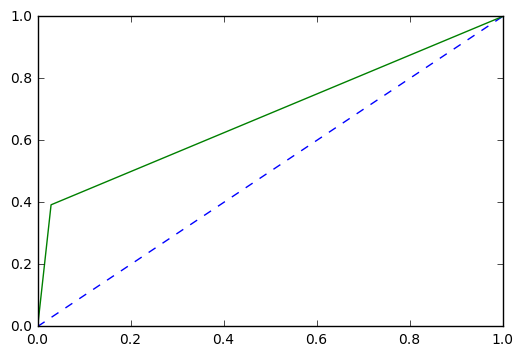

In [298]:
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_pred_rf)
print 'F1 Score :', metrics.f1_score(y_test, y_pred_rf)
print 'AUC:', metrics.auc(fpr_rf, tpr_rf)

print plot([0,1],[0,1],'--', fpr_rf, tpr_rf)

In [299]:
print 'Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred_rf)
print 'Precision:', metrics.precision_score(y_test, y_pred_rf)
print 'Recall:', metrics.recall_score(y_test, y_pred_rf)
print 'Precision, Recall, F Score:', metrics.precision_recall_fscore_support(y_test, y_pred_rf)

Confusion matrix:
[[2361   70]
 [ 528  341]]
Precision: 0.829683698297
Recall: 0.392405063291
Precision, Recall, F Score: (array([ 0.8172378,  0.8296837]), array([ 0.97120527,  0.39240506]), array([ 0.88759398,  0.5328125 ]), array([2431,  869], dtype=int64))


In [314]:
X_test.as_matrix()[np.where(ravel(y_test) != y_pred_rf)].shape

(598L, 247L)

In [308]:
pd.DataFrame(y_pred_rf)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [309]:
y_test

,gender
author,
excursionmoney,0
WorldWar2Chains,0
Hawkeye1113,0
Yorigin,0
VaginaCreature9001,1
floydrose,0
Bongopro,0
bb_or_not_bb,1
forreal_dude,1


### 4.5.1 Tuning 

#### 4.5.1.1. Su dataframe normalizzato sul numero di post

In [51]:
train_data_authors_normalized = train_data_authors.div\
(train_data_authors['TOT_POSTS'], axis='index')
train_data_authors_normalized.head()

,TOT_POSTS,ASKREDDIT,BEYONDTHEBUMP,ASKMEN,ASKWOMEN,EXPLOREFICTION,ADVICEANIMALS,FUNNY,NFL,PICS,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,1.0,0.0,0.0,0.0,0.8,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
-Beth-,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
-Greeny-,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
-Jared,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.166667,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
-MM-,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.000000,...,0.043478,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,0.130435,0.0


In [52]:
column_sums = train_data_authors_normalized.sum(axis='index')
for name_col in train_data_authors_normalized.columns:
    if (column_sums[name_col]==10000) or (column_sums[name_col]==0):
        print name_col, '-->', column_sums[name_col]
# per vedere se c'è qualche 10000 o 0 da togliere

TOT_POSTS --> 10000.0


In [53]:
train_data_authors_normalized = train_data_authors_normalized\
[train_data_authors_normalized.columns[1:]]

In [54]:
train_data_authors_normalized.head()

,ASKREDDIT,BEYONDTHEBUMP,ASKMEN,ASKWOMEN,EXPLOREFICTION,ADVICEANIMALS,FUNNY,NFL,PICS,WTF,...,funny,hear,honestly,totally,mine,support,word,leave,turn,non
author,,,,,,,,,,,,,,,,,,,,,
-Allaina-,0.0,0.0,0.0,0.8,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
-Beth-,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
-Greeny-,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.166667,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
-Jared,0.5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.166667,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
-MM-,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.000000,0.000000,...,0.043478,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,0.130435,0.0


In [60]:
X_train, X_test, y_train, y_test =\
cs.train_test_split(train_data_authors_normalized,train_target, test_size=0.33,random_state=42)

In [372]:
#X_train.ix['Sr_deez'][1:47].sum()

In [62]:
from sklearn import ensemble

model_rf = ensemble.RandomForestClassifier(n_estimators=1000, random_state=0)
model_rf.fit(X_train,ravel(y_train))

y_pred_rf = model_rf.predict(X_test)

In [63]:
model_rf_3h = ensemble.RandomForestClassifier(n_estimators=1000, random_state=0)
model_rf_3h.fit(X_train,ravel(y_train))

y_pred_rf_3h = model_rf_3h.predict_proba(X_test)

F1 Score : 0.585190510424
AUC: 0.710524397419
AUC (3h): 0.827106150466
[<matplotlib.lines.Line2D object at 0x000000006B8727B8>, <matplotlib.lines.Line2D object at 0x00000000427C0400>, <matplotlib.lines.Line2D object at 0x000000006B872F28>]


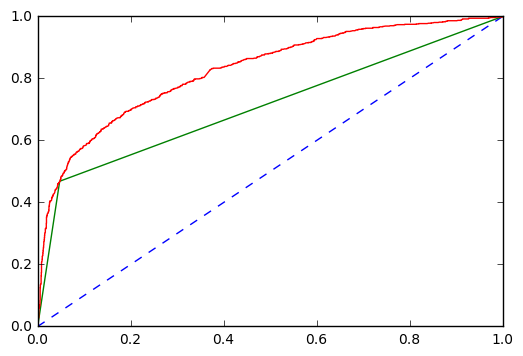

In [64]:
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_pred_rf)
fpr_rf_3h, tpr_rf_3h, _ = metrics.roc_curve(y_test, y_pred_rf_3h[:,1])
print 'F1 Score :', metrics.f1_score(y_test, y_pred_rf)
#print 'F1 Score (3h):', metrics.f1_score(y_test, y_pred_rf_3h[:,1])
print 'AUC:', metrics.auc(fpr_rf, tpr_rf)
print 'AUC (3h):', metrics.auc(fpr_rf_3h, tpr_rf_3h)

print plot([0,1],[0,1],'--', fpr_rf, tpr_rf, fpr_rf_3h, tpr_rf_3h)
#print fpr_rf
#print tpr_rf

#Confronto con Random Forest subreddit_more_2000
#F1 Score : 0.558173784978
#AUC: 0.695442308994
#AUC (3h): 0.815715354841

In [492]:
print y_pred_rf_3h[:,1]
print len(y_pred_rf_3h[:,1])

[ 0.283       0.28        0.22267544 ...,  0.3051      0.345       0.374     ]
3300


In [432]:
print 'Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred_rf)
print 'Precision:', metrics.precision_score(y_test, y_pred_rf)
print 'Recall:', metrics.recall_score(y_test, y_pred_rf)
print 'Precision, Recall, F Score:', metrics.precision_recall_fscore_support(y_test, y_pred_rf)

Confusion matrix:
[[2321  110]
 [ 490  379]]
Precision: 0.775051124744
Recall: 0.436133486766
Precision, Recall, F Score: (array([ 0.82568481,  0.77505112]), array([ 0.95475113,  0.43613349]), array([ 0.88553987,  0.55817378]), array([2431,  869], dtype=int64))


In [376]:
X_test.as_matrix()[np.where(ravel(y_test) != y_pred_rf)].shape

(599L, 246L)

[<matplotlib.lines.Line2D object at 0x000000004A30ED30>, <matplotlib.lines.Line2D object at 0x000000004A30E9B0>, <matplotlib.lines.Line2D object at 0x000000004A30EA58>, <matplotlib.lines.Line2D object at 0x000000004A30E438>]


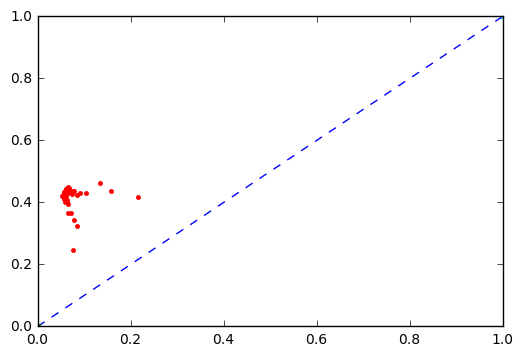

In [400]:
fpr_rf_tot = []
tpr_rf_tot = []
for n in xrange(1,50):
    model_rf_n = ensemble.RandomForestClassifier(n_estimators=n, random_state=0)
    model_rf_n.fit(X_train,ravel(y_train))
    y_pred_rf_n = model_rf_n.predict(X_test)
    fpr_rf_n, tpr_rf_n, _ = metrics.roc_curve(y_test, y_pred_rf_n)
    fpr_rf_tot.append(fpr_rf_n)
    tpr_rf_tot.append(tpr_rf_n)

print plot([0,1],[0,1],'--', fpr_rf_tot, tpr_rf_tot, '.')
#print fpr_rf_tot,'\n', tpr_rf_tot

In [65]:
from sklearn import svm

model = svm.SVC(kernel='rbf', gamma=0.1, C=100.)

#Cs = np.logspace(-2,2,10)
#gammas = np.logspace(-4, 0, 10)

#gs = grid_search.GridSearchCV(model, {'gamma': gammas, 'C': Cs}, cv=10)
#gs.fit(X_train,ravel(y_train))
model.fit(X_train,ravel(y_train))

#print "best:", gs.best_params_

#y_pred = gs.predict(X_test)
y_pred = model.predict(X_test)

In [66]:
from sklearn import svm

model_3h = svm.SVC(kernel='rbf', gamma=0.1, C=100., probability=True)
model_3h.fit(X_train,ravel(y_train))

y_pred_3h = model_3h.predict_proba(X_test)

F1 Score : 0.635743519782
AUC: 0.741180636192
AUC (3h): 0.849494849563
[<matplotlib.lines.Line2D object at 0x000000006E5A6048>, <matplotlib.lines.Line2D object at 0x000000004265E160>, <matplotlib.lines.Line2D object at 0x000000006E5A67B8>]


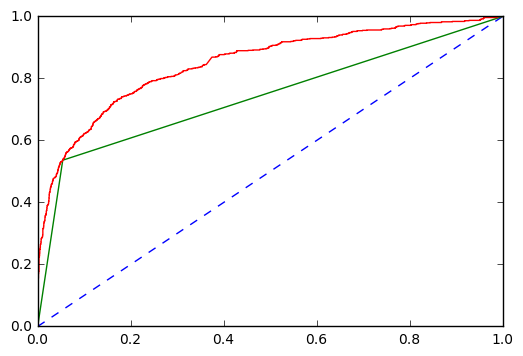

In [67]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
print 'F1 Score :', metrics.f1_score(y_test, y_pred)
print 'AUC:', metrics.auc(fpr, tpr)

fpr_3h, tpr_3h, _ = metrics.roc_curve(y_test, y_pred_3h[:,1])
#print 'F1 Score :', metrics.f1_score(y_test, y_pred_3h[:,1])
print 'AUC (3h):', metrics.auc(fpr_3h, tpr_3h)

print plot([0,1],[0,1],'--', fpr, tpr, fpr_3h, tpr_3h)

#Paragone con Random Forest
#F1 Score : 0.558173784978
#AUC: 0.695442308994
#AUC (3h): 0.815715354841

In [68]:
from sklearn import linear_model

model = linear_model.LogisticRegression(penalty='l1', C=.9)
model.fit(X_train,ravel(y_train))

y_pred = model.predict(X_test)

In [69]:
from sklearn import linear_model

model_3h = linear_model.LogisticRegression(penalty='l1', C=.9)
model_3h.fit(X_train,ravel(y_train))

y_pred_3h = model_3h.predict_proba(X_test)

F1 Score : 0.551671732523
AUC: 0.691583918687
AUC (3h): 0.836030719433
[<matplotlib.lines.Line2D object at 0x000000006D3AE518>, <matplotlib.lines.Line2D object at 0x0000000068E06C88>, <matplotlib.lines.Line2D object at 0x000000006D3AEC88>]


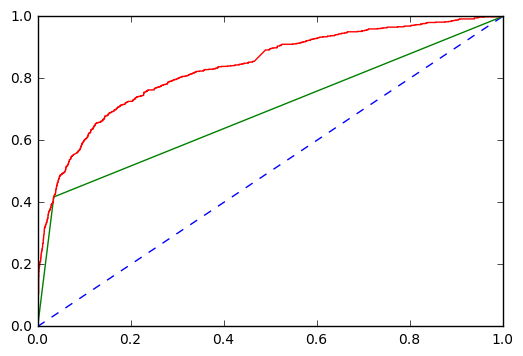

In [70]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
print 'F1 Score :', metrics.f1_score(y_test, y_pred)
print 'AUC:', metrics.auc(fpr, tpr)

fpr_3h, tpr_3h, _ = metrics.roc_curve(y_test, y_pred_3h[:,1])
#print 'F1 Score :', metrics.f1_score(y_test, y_pred)
print 'AUC (3h):', metrics.auc(fpr_3h, tpr_3h)

print plot([0,1],[0,1],'--', fpr, tpr, fpr_3h, tpr_3h)

#Confronto SVM
#F1 Score : 0.579359430605
#AUC: 0.707644923952
#AUC (3h): 0.828316068958

#### 4.5.1.2. Su dataframe uno/zero

In [450]:
train_data_authors_ones_zeros = train_data_authors_normalized.applymap(lambda x: 1 if x else 0)

In [496]:
X_train, X_test, y_train, y_test =\
cs.train_test_split(train_data_authors_ones_zeros,train_target, test_size=0.33,random_state=42)

In [497]:
from sklearn import ensemble

model_rf = ensemble.RandomForestClassifier(n_estimators=1000, random_state=0)
model_rf.fit(X_train,ravel(y_train))

y_pred_rf = model_rf.predict_proba(X_test)

In [498]:
y_pred_rf

array([[ 0.843     ,  0.157     ],
       [ 0.752     ,  0.248     ],
       [ 0.6825    ,  0.3175    ],
       ..., 
       [ 0.7102619 ,  0.2897381 ],
       [ 0.639     ,  0.361     ],
       [ 0.62333452,  0.37666548]])

AUC: 0.802119629507
[<matplotlib.lines.Line2D object at 0x0000000070396828>, <matplotlib.lines.Line2D object at 0x000000003BD571D0>]


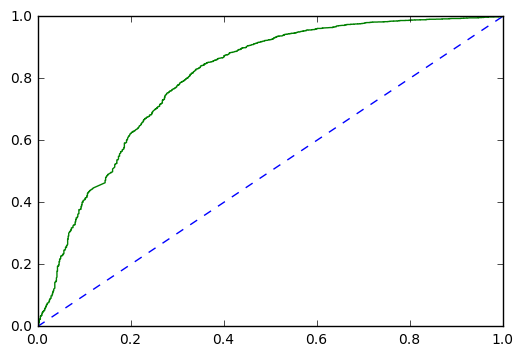

In [499]:
tpr_rf, fpr_rf, _ = metrics.roc_curve(y_test, y_pred_rf[:,0])
#print 'F1 Score :', metrics.f1_score(y_test, y_pred_rf[:,0], average=None)
print 'AUC:', metrics.auc(fpr_rf, tpr_rf)

print plot([0,1],[0,1],'--', fpr_rf, tpr_rf)
#AUC (3h): 0.815715354841

In [500]:
from sklearn import svm

model_3h = svm.SVC(kernel='rbf', gamma=0.1, C=100., probability=True)
model_3h.fit(X_train,ravel(y_train))

y_pred_3h = model_3h.predict_proba(X_test)

AUC (3h): 0.68574047627
[<matplotlib.lines.Line2D object at 0x0000000077808EF0>, <matplotlib.lines.Line2D object at 0x0000000058060320>]


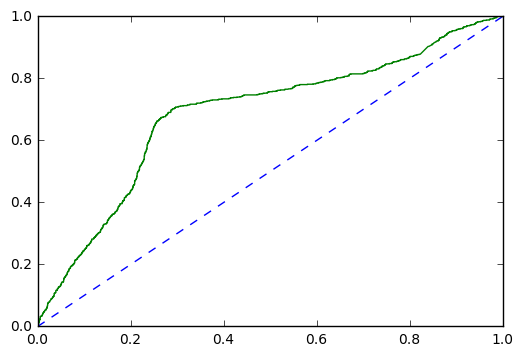

In [502]:
fpr_3h, tpr_3h, _ = metrics.roc_curve(y_test, y_pred_3h[:,1])
#print 'F1 Score :', metrics.f1_score(y_test, y_pred)
print 'AUC (3h):', metrics.auc(fpr_3h, tpr_3h)

print plot([0,1],[0,1],'--', fpr_3h, tpr_3h)

#Paragone con SVM normalizzato
#F1 Score : 0.579359430605
#AUC: 0.707644923952
#AUC (3h): 0.828316068958

### 4.5.1.3. Elimino tutte le colonne relative al body

In [603]:
train_data_authors_bodywords_drops = train_data_authors_normalized[train_data_authors_normalized.columns[:46]]

In [604]:
X_train, X_test, y_train, y_test =\
cs.train_test_split(train_data_authors_bodywords_drops,train_target, test_size=0.33,random_state=42)

In [605]:
from sklearn import ensemble

model_rf = ensemble.RandomForestClassifier(n_estimators=1000, random_state=0)
model_rf.fit(X_train,ravel(y_train))

y_pred_rf = model_rf.predict_proba(X_test)

AUC: 0.786176255208
[<matplotlib.lines.Line2D object at 0x000000006EEE4710>, <matplotlib.lines.Line2D object at 0x00000000A3AE6668>]


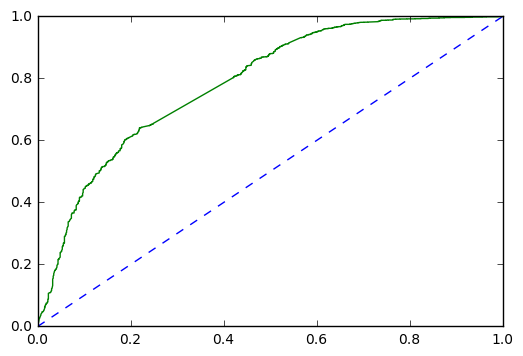

In [606]:
tpr_rf, fpr_rf, _ = metrics.roc_curve(y_test, y_pred_rf[:,0])
#print 'F1 Score :', metrics.f1_score(y_test, y_pred_rf[:,0], average=None)
print 'AUC:', metrics.auc(fpr_rf, tpr_rf)

print plot([0,1],[0,1],'--', fpr_rf, tpr_rf)
#AUC (3h): 0.815715354841

In [607]:
from sklearn import svm

model_3h = svm.SVC(kernel='rbf', gamma=0.1, C=100., probability=True)
model_3h.fit(X_train,ravel(y_train))

y_pred_3h = model_3h.predict_proba(X_test)

AUC (3h): 0.78280732332
[<matplotlib.lines.Line2D object at 0x0000000070372588>, <matplotlib.lines.Line2D object at 0x00000000497315F8>]


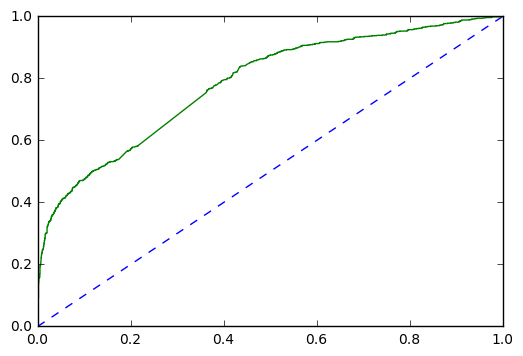

In [608]:
fpr_3h, tpr_3h, _ = metrics.roc_curve(y_test, y_pred_3h[:,1])
#print 'F1 Score :', metrics.f1_score(y_test, y_pred)
print 'AUC (3h):', metrics.auc(fpr_3h, tpr_3h)

print plot([0,1],[0,1],'--', fpr_3h, tpr_3h)

#Paragone con SVM normalizzato
#F1 Score : 0.579359430605
#AUC: 0.707644923952
#AUC (3h): 0.828316068958